In [100]:
# this function reads data from a spreadsheet
def read_xlsx(xrow,xcol1,xcol2):
    import xlrd
    file = '/home/vagrant/jupyter/methane_modeling/one_box_model/oneboxmodel.xlsx'
    wb=xlrd.open_workbook(file)
    sheet=wb.sheet_by_index(0)
    data=[]
    for i in range (xcol1,xcol2):
        data.append(sheet.cell_value(xrow,i))
    return data

In [67]:
import numpy 
import math
from matplotlib import pyplot, axes 
from scipy import stats

In [101]:
# converting burden data in the spreadsheet from ppb to Tg
conv_factor=2

ch4i_data_unconverted=read_xlsx(1,4,37)
ch4i_data=[i*conv_factor for i in ch4i_data_unconverted]

ch4f_data_unconverted=read_xlsx(2,4,37)
ch4f_data=[i*conv_factor for i in ch4f_data_unconverted]


In [104]:
#reading more data from box model spreadsheet
year=read_xlsx(0,4,37)
Qbb_data=read_xlsx(31,4,37)
Qsoil_data=read_xlsx(33,4,37)
del_13Cff_data=read_xlsx(28,4,37)
del_13Cmic_data=read_xlsx(27,4,37)
del_13Ctot_data=read_xlsx(24,4,37)
del_13Cbb_data=read_xlsx(29,4,37)

Text(0.5, 1.0, 'Methane Emissions from 1984 to 2016')

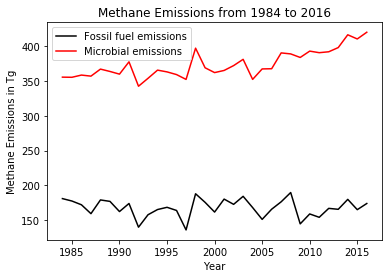

In [105]:
#chemical lifetime in years
tau=9  
#starting year (time step=1 year)
yr1=1984.
#number of years
nyrs=33

#solving for Qatm
def Qatm_values(t,tau,ch4i,ch4f):
    Qatm=(ch4f-ch4i*math.exp(-t/tau))/(tau*(1.-math.exp(-t/tau)))
    return Qatm

ch4f=numpy.zeros(nyrs)
for i in range(nyrs):
    ch4f[i]=ch4f_data[i]

ch4i=numpy.zeros(nyrs)
for i in range(nyrs):
    ch4i[i]=ch4i_data[i]

Qatm=numpy.zeros(nyrs)
for i in range (nyrs):
    t=1
    x=Qatm_values(t,tau,ch4i[i],ch4f[i])
    Qatm[i]=x
    

#solving for Qff using calculated Qatm
def fossil_fuel_burden(Qatm,Qbb,Qsoil,del_13Cff,del_13Cmic,del_13Ctot,del_13Cbb):
    Qff=1./(del_13Cff-del_13Cmic)*(del_13Ctot*(Qtot-Qsoil)-del_13Cmic*(Qatm-Qbb-Qsoil)-del_13Cbb*(Qbb))
    return Qff

Qbb=numpy.zeros(nyrs)
for i in range(nyrs):
    Qbb[i]=Qbb_data[i]
    
Qsoil=numpy.zeros(nyrs)
for i in range(nyrs):
    Qsoil[i]=Qsoil_data[i]

del_13Cff=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cff[i]=del_13Cff_data[i]
    
del_13Cmic=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cmic[i]=del_13Cmic_data[i]
    
del_13Ctot=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Ctot[i]=del_13Ctot_data[i]
    
del_13Cbb=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cbb[i]=del_13Cbb_data[i]
    
#solving for Qmic using calculated Qatm and Qff
def microbial_burden(Qatm,Qff,Qbb,Qsoil):
    Qmic=Qatm-Qff-Qbb-Qsoil
    return Qmic
    
#plotting solutions
pyplot.plot(year,Qff,color='black') 
pyplot.plot(year,Qmic,color='red')
pyplot.legend(["Fossil fuel emissions","Microbial emissions"])
pyplot.xlabel("Year")
pyplot.ylabel("Methane Emissions in Tg")
pyplot.title("Methane Emissions from 1984 to 2016")